## Text classification on LeMonde2003 Dataset

In this notebook, we 
apply classification algorithms to newspaper articles published in 2003 in *Le Monde*. 

The data are here : https://cloud.teklia.com/index.php/s/isNwnwA7a7AWst6/download/LeMonde2003_9classes.csv.gz

Download it into the data directory : 

```
wget https://cloud.teklia.com/index.php/s/isNwnwA7a7AWst6/download/LeMonde2003_9classes.csv.gz
```

Or you can download the file directly from the URL in pandas with `pd.read_csv(url)`.`

These articles concern different subjects but we will consider only articles related to the following subjects : entreprises (ENT), international (INT), arts (ART), société (SOC), France (FRA), sports (SPO), livres (LIV), télévision (TEL) and the font page articles (UNE).


> * Load the CSV file `LeMonde2003_9classes.csv.gz` containing the articles using pandas [pd.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). How many articles do you have ? 
> * Plot the frequency histogram of the categories using seaborn [countplot](https://seaborn.pydata.org/tutorial/categorical.html) : `sns.countplot(data=df,y='category')`
> * Display the text of some of the article with the corresponding class using pandas [sample](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html)
> * Using the [WordCloud library](https://amueller.github.io/word_cloud/index.html), display a word cloud for the most frequent classes. You can remove the stop words using the `stopwords` option, using the list of stop words in French in `data/stop_word_fr.txt` or from the URL https://cloud.teklia.com/index.php/s/3mwZfSre4PmJcdb/download/stop_word_fr.txt



In [33]:
import pandas as pd

# load dataframe from CSV file
# YOUR CODE HERE
url="https://cloud.teklia.com/index.php/s/isNwnwA7a7AWst6/download/LeMonde2003_9classes.csv.gz"
data=pd.read_csv(url)
data.head()

,text,category
0,"a la boutique du fulham fc nichée au dernier étage du grand magasin harrods le portrait de mohammed al-fayed est omniprésent le visage souriant du propriétaire égyptien du prestigieux établissement de knightsbridge comme du club anglais est à l'affiche partout sur les calendriers les maillots de corps les publicités en revanche pas la moindre trace de jean tigana lâché par le magnat égyptien ses jours paraissaient comptés depuis quelque temps déjà l'annonce mercredi 26 mars du non- renouvellement de son contrat à la fin de la présente saison n'aura donc surpris personne en mai prochain jean tigana quittera fulham depuis mai 2000 date d'arrivée dans le club qu'il avait contribué à remonter parmi l'élite en mai 2000 l'entraîneur n'a cessé de voir son image se dégrader eclaboussé notamment par le scandale du transfert de steve marlet a l'été 2001 tigana obtient l'autorisation d'acheter un attaquant supplémentaire pour renforcer le secteur offensif de son équipe son choix se porte sur steve marlet de l'olympique lyonnais pour 11,5 millions de livres 16,95 millions d'euros très vite devant les prestations en dents de scie du français la presse s'interroge sur le prix élevé payé par tigana fayed lance sa propre enquête et découvre que l'agent chargé du dossier a agi à la fois pour lyon et fulham ce qu'interdit la loi anglaise le club londonien décide alors de retenir le dernier tiers du transfert et la prime de l'agent le dossier est transmis à la fédération internationale fifa tigana a beau clamer son innocence les soupçons pèsent sur lui en raison de son passé d'agent pour superviser les transferts fayed nomme alors l'italien franco baresi comme directeur du club le 1er juin inquiet de cette concurrence tigana se débarrasse rapidement de l'ancienne star du milan ac qui dégoûté par ces intrigues claque la porte après deux mois fayed a peu apprécié ce camouflet et ne cesse depuis de tailler des croupières à son manager tigana est également dans le collimateur de la presse pour l'achat onéreux du défenseur marocain abdeslam ouaddou le président fondateur de harrods holdings se serait bien passé de la contre-publicité de l'affaire marlet fayed serait actuellement à court d'argent l'abandon de son projet d'inscription partielle de harrods holdings à la bourse de new york l'atteste tout comme le report aux calendes grecques du projet de construction d'un stade ultra-moderne de 28 000 places en remplacement de craven cottage artifices comptables depuis deux saisons les noir et blanc du fulham fc sont ainsi contraints de disputer leurs rencontres à domicile à loftus road fief habituel des queen 's park rangers dans l'ouest londonien le club qui a perdu 35,37 millions d'euros en 2002 est surendetté en raison des 88,43 millions d'euros au minimum engloutis par fayed depuis 1997 les banquiers hésitent à accorder une rallonge au milliardaire en raison de l'incroyable complexité financière de son groupe la city soupçonne fayed d'utiliser le club pour dissimuler des artifices comptables et des opérations financières obscures visant à brouiller les pistes le récent remplacement des commissaires aux comptes de harrods holdings a renforcé les craintes des créanciers malgré les millions dépensés fulham fait pâle figure par rapport à ses rivaux londoniens arsenal chelsea charlton ou encore tottenham mais ce que reproche surtout fayed à son entraîneur au bout du compte c'est de ne pas lui avoir apporté cette respectabilité à laquelle il aspire depuis le refus des autorités de lui accorder la nationalité britannique",SPO
1,pour la plupart de ceux qui n'y vivent pas la vie dans les cités se résume trop souvent aux images de violence qu'en montrent les journaux télévisés afin de casser cette vision caricaturale l'équipe de c'est pas sorcier le magazine de vulgarisation scientifique de france 3 destiné aux enfants a fait une halte à la courneuve une cité de la banlieue parisienne située à 3 kilomètres à peine de la capitale a l'aide de 

<Axes: xlabel='category', ylabel='count'>

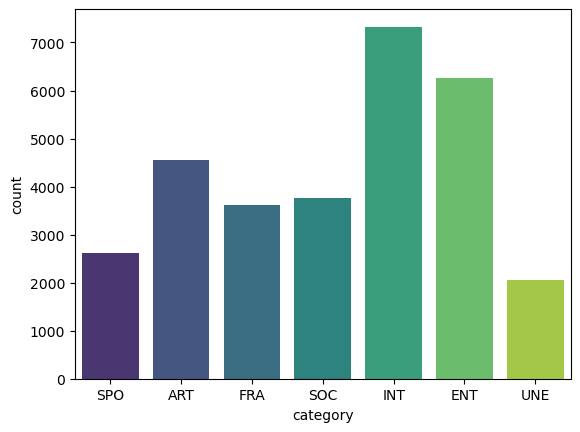

In [34]:
import seaborn as sns
%matplotlib inline

# Plot the statistics of category
# YOUR CODE HERE
sns.countplot(data=data, x='category', hue='category',palette='viridis')

In [35]:
# Print examples of the articles
pd.set_option('display.max_colwidth', None)
# YOUR CODE HERE

print(data['text'].head(2))# print 2 examples

0    a la boutique du fulham fc nichée au dernier étage du grand magasin harrods le portrait de mohammed al-fayed est omniprésent le visage souriant du propriétaire égyptien du prestigieux établissement de knightsbridge comme du club anglais est à l'affiche partout sur les calendriers les maillots de corps les publicités en revanche pas la moindre trace de jean tigana lâché par le magnat égyptien ses jours paraissaient comptés depuis quelque temps déjà l'annonce mercredi 26 mars du non- renouvellement de son contrat à la fin de la présente saison n'aura donc surpris personne en mai prochain jean tigana quittera fulham depuis mai 2000 date d'arrivée dans le club qu'il avait contribué à remonter parmi l'élite en mai 2000 l'entraîneur n'a cessé de voir son image se dégrader eclaboussé notamment par le scandale du transfert de steve marlet a l'été 2001 tigana obtient l'autorisation d'acheter un attaquant supplémentaire pour renforcer le secteur offensif de son équipe son choix se porte sur

In [36]:
!pip install wordcloud

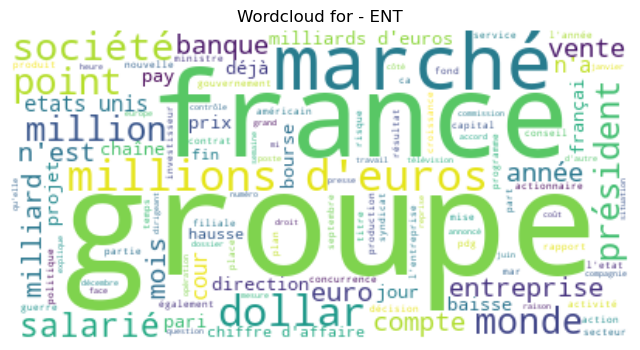

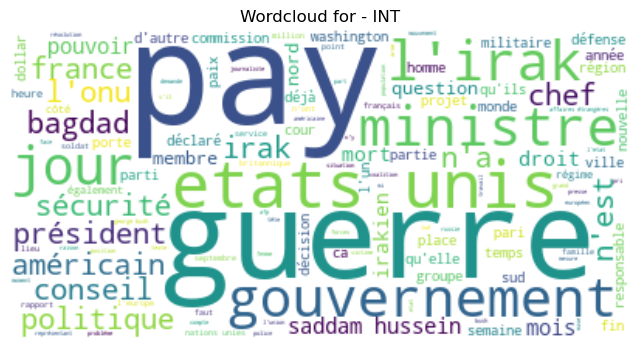

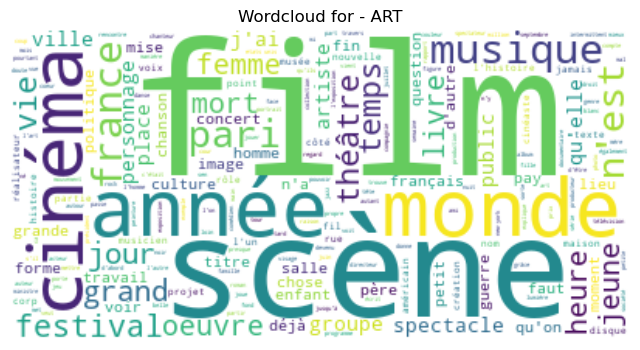

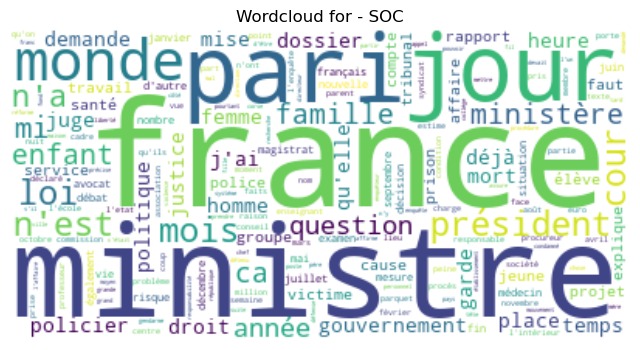

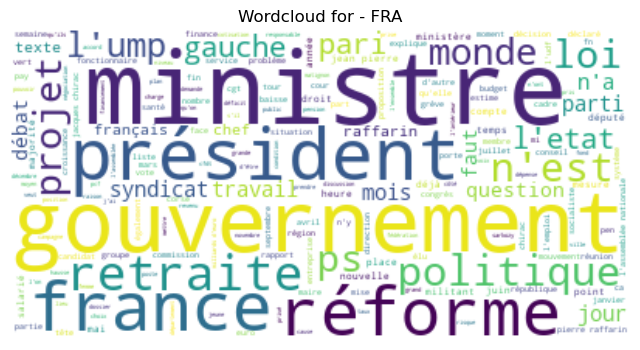

In [37]:
from wordcloud import WordCloud
# Display one wordcloud for each of the most frequent classes

from wordcloud import WordCloud
STOPWORDS = [x.strip() for x in open('data/stop_word_fr.txt').readlines()]
import matplotlib.pyplot as plt

# plot a word cloud for each category
for cat in ['ENT', 'INT',  'ART', 'SOC', 'FRA']:
 # YOUR CODE HERE
     # filter text of each cat
    cat_text = data[data['category'] == cat]['text']
    # joint in one chain
    cat_text = ' '.join(cat_text)
    
    # wordcloud of cat
    wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white').generate(cat_text)
    
    # figure
    plt.figure(figsize=(8, 6)) # size of figure
    plt.imshow(wordcloud, interpolation='bilinear')# to show the image
    plt.axis('off')  # don't show axis
    plt.title(f'Wordcloud for - {cat}')#rename title
    plt.show()

## Bag-of-word representation

In order to apply machine learning algorithms to text, documents must be transformed into vectors. The most simple and standard way to transform a document into a vector is the *bag-of-word* encoding.

The idea is very simple : 

1. define the set of all the possible words that can appear in a document; denote its size by `max_features`.
2. for each document,  encode it with a vector of size `max_features`, with the value of the ith component of the vector equal to the number of time the ith word appears in the document.

See [the wikipedia article on Bag-of-word](https://en.wikipedia.org/wiki/Bag-of-words_model) for an example.

Scikit-learn proposes different methods to encode text into vectors : [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) and [TfidfTransformer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html).

The encoder must first be trained on the train set and applied to the different sets, for example with the 200  words : 

	from sklearn.feature_extraction.text import CountVectorizer
	vectorizer = CountVectorizer(max_features=200)
    vectorizer.fit(X_train)
    X_train_counts = vectorizer.transform(X_train)
    X_test_counts = vectorizer.transform(X_test)
        
**Question**:

> * Split the dataset LeMonde2003 into train set (80%), dev set (10%)  and test set (10%) using scikit-learn [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
> * For each set, transform the text of the articles into vectors using the `CountVectorizer`, considering the 1000 most frequent words. 
> * Train a naive bayes classifier on the data. 
> * Evaluate the classification accuracy on the train, dev and test sets using the [score](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB.score) method. 

> ***Important*** : the test set must not be used during the training phase, and learning the vector representation of the words is part of the training. The dev set should be an evaluation of the test set.



In [38]:
from sklearn.model_selection import train_test_split
# Split the dataset, create X (features) and y (target), print the size
# YOUR CODE HERE

X = data['text']  # Features 
y = data['category']  # Target 

# print the size
print(f"size of X : {X.shape}")
print(f"size of y : {y.shape}")

# split data

## step 1 : split in train (80%) et temp (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

## step 2: split temp in dev (10%) and test
X_dev, X_test, y_dev, y_test=  train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

size of X : (30165,)
size of y : (30165,)


In [39]:
from sklearn.feature_extraction.text import CountVectorizer
# Create document vectors
# YOUR CODE HERE
# create the vectorizer object
vectorizer = CountVectorizer(max_features=200)
# fit on train data
vectorizer.fit(X_train)
# apply it on train and dev data

X_train_counts = vectorizer.transform(X_train)
X_dev_counts = vectorizer.transform(X_dev)

In [40]:
from sklearn.naive_bayes import MultinomialNB
# train a Naive Bayes classifier
# YOUR CODE HERE
# create the MultinomialNB
model=MultinomialNB()

# Train 
model.fit(X_train_counts, y_train)
# Evaluate 
### Prediction
y_dev_pred = model.predict(X_dev_counts)
y_train_pred = model.predict(X_train_counts)
from sklearn.metrics import accuracy_score
accuracy1 = accuracy_score(y_train, y_train_pred)
accuracy2 = accuracy_score(y_dev, y_dev_pred)
print(f"accuracy on train: {accuracy1:.2f}")
print(f"accuracy on dev: {accuracy2:.2f}")

accuracy on train: 0.56
accuracy on dev: 0.54


In [41]:
# Transformer X_test in vector
X_test_vect = vectorizer.transform(X_test)

# evaluate on the test set
test_accuracy = model.score(X_test_vect, y_test)

print(f"accuracy : {test_accuracy:.2f}")

accuracy : 0.56


## TF-IDF representation

The `CountVectorizer` encodes the text using the raw frequencies of the words. However, words that are very frequent and appear in all the documents will have a strong weight whereas they are not discriminative. The *Term-Frequency Inverse-Document-Frequency* weighting scheme take into accound the number of documents in which a given word occurs. A word that appear in many document will have less weight. See [the wikipedia page](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) for more details.

With scikit-learn, the `TfidfTransformer` is applied after the `CountVectorizer` :

	from sklearn.feature_extraction.text import TfidfTransformer
	tf_transformer = TfidfTransformer().fit(X_train_counts)
 	X_train_tf = tf_transformer.transform(X_train_counts)
	X_test_tf = tf_transformer.transform(X_test_counts)
	
**Question**:

> * Use the TF-IDF representation to train a Multinomial Naive Bayes classifier. Report your best test error rate and the error rates for all the configurations tested.

In [42]:
from sklearn.feature_extraction.text import TfidfTransformer
# YOUR CODE HERE
#ici on vectorise en utilisant TF-idf
tf_transformer = TfidfTransformer().fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_dev_tf = tf_transformer.transform(X_dev_counts)

In [43]:
# Define hyperparameter grid
alphas = [0.1, 0.5, 1.0, 2.0, 5.0]

best_dev_error = float('inf')
best_model = None
results = []

# Train and evaluate on different alpha values
for alpha in alphas:
    model = MultinomialNB(alpha=alpha)
    model.fit(X_train_tf, y_train)
    
    # Evaluate on dev set
    dev_predictions = model.predict(X_dev_tf)
    dev_error = 1 - accuracy_score(y_dev, dev_predictions)
    
    results.append((alpha, dev_error))# add error en fonction de alpha
    
    if dev_error < best_dev_error:
        best_dev_error = dev_error
        best_model = model

# Evaluate the best model on the test set.

#####  Transformer X_test in vector with tfidf
X_test_tf = tf_transformer.transform(X_test_vect)
test_predictions = best_model.predict(X_test_tf)
test_error = 1 - accuracy_score(y_test, test_predictions)

# Print results
print("Error rates for different alpha values:")
for alpha, error in results:
    print(f"Alpha: {alpha}, Dev Error: {error:.4f}")

print(f"\nBest model (alpha={best_model.alpha}) Test Error: {test_error:.4f}")

Error rates for different alpha values:
Alpha: 0.1, Dev Error: 0.5076
Alpha: 0.5, Dev Error: 0.5080
Alpha: 1.0, Dev Error: 0.5076
Alpha: 2.0, Dev Error: 0.5113
Alpha: 5.0, Dev Error: 0.5172

Best model (alpha=0.1) Test Error: 0.4896


## Error analysis

The classification error rate give an evaluation of the performance for all the classes. But since the classes are not equally distributed, they may not be equally well modelized. In order to get a better idea of the performance of the classifier, detailed metrics must be used : 

* [metrics.classification_report](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) provides a detailed analysis per class : the precision (amongst all the example classified as class X, how many are really from the classX) and the recall (amongst all the example that are from the class X, how many are classified as class X) and the F-Score which is as a weighted harmonic mean of the precision and recall.
* [metrics.confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) which give the confusions between the classes. It can be displayed in color with [plot_confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix).

**Question**:

> * Report the `classification_report` for your  classifier. Which classes have the best scores ? Why ?
> * Report the `confusion_matrix` for your  classifier. Which classes are the most confused ? Why ?


              precision    recall  f1-score   support

         ART       0.61      0.64      0.62       466
         ENT       0.52      0.70      0.60       598
         FRA       0.71      0.16      0.26       357
         INT       0.45      0.92      0.60       750
         SOC       0.58      0.13      0.22       364
         SPO       0.88      0.10      0.19       278
         UNE       0.00      0.00      0.00       204

    accuracy                           0.51      3017
   macro avg       0.54      0.38      0.36      3017
weighted avg       0.54      0.51      0.44      3017

Matrice de confusion


/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


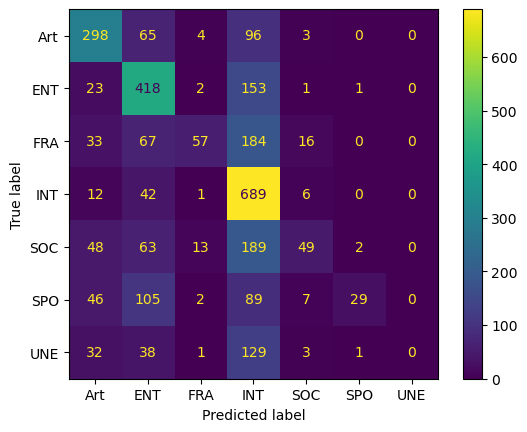

In [44]:
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay

# YOUR CODE HERE

## classification report
print(classification_report(y_test, test_predictions))
## confusion matrix

dis=ConfusionMatrixDisplay(confusion_matrix(y_test, test_predictions), display_labels=["Art", "ENT", "FRA", "INT", "SOC", "SPO", "UNE"])
print("Matrice de confusion")
dis.plot()

the class which have the best score according to classification report is spo beacause it have the highest precision (0.88)

according to the confusion matrix the classes which are most confused are: UNE et SPO because the model didn't predict any value of "UNE" correctely and the model confuse "Spo" with "Ent" in prediction 

## Data re-configuration
After the error analysis, we came to the conclusion that one of the class can not be distinguised from the others. There is no use trying to solve an impossible problem.

**Questions**:

> * Remove the class `UNE` from the original dataset and merge the semantically close classes 'FRANCE' and 'SOCIETE'
> * Plot the class statitics with seaborn
> * Create new splits
> * Retrain a NaiveBayes classifier using [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) with the 1000 most frequent words.

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
# YOUR CODE HERE

# Filter out the UNE class
df_filtered = data[data['category'] != 'UNE']
df_filtered.head(2)

,text,category
0,"a la boutique du fulham fc nichée au dernier étage du grand magasin harrods le portrait de mohammed al-fayed est omniprésent le visage souriant du propriétaire égyptien du prestigieux établissement de knightsbridge comme du club anglais est à l'affiche partout sur les calendriers les maillots de corps les publicités en revanche pas la moindre trace de jean tigana lâché par le magnat égyptien ses jours paraissaient comptés depuis quelque temps déjà l'annonce mercredi 26 mars du non- renouvellement de son contrat à la fin de la présente saison n'aura donc surpris personne en mai prochain jean tigana quittera fulham depuis mai 2000 date d'arrivée dans le club qu'il avait contribué à remonter parmi l'élite en mai 2000 l'entraîneur n'a cessé de voir son image se dégrader eclaboussé notamment par le scandale du transfert de steve marlet a l'été 2001 tigana obtient l'autorisation d'acheter un attaquant supplémentaire pour renforcer le secteur offensif de son équipe son choix se porte sur steve marlet de l'olympique lyonnais pour 11,5 millions de livres 16,95 millions d'euros très vite devant les prestations en dents de scie du français la presse s'interroge sur le prix élevé payé par tigana fayed lance sa propre enquête et découvre que l'agent chargé du dossier a agi à la fois pour lyon et fulham ce qu'interdit la loi anglaise le club londonien décide alors de retenir le dernier tiers du transfert et la prime de l'agent le dossier est transmis à la fédération internationale fifa tigana a beau clamer son innocence les soupçons pèsent sur lui en raison de son passé d'agent pour superviser les transferts fayed nomme alors l'italien franco baresi comme directeur du club le 1er juin inquiet de cette concurrence tigana se débarrasse rapidement de l'ancienne star du milan ac qui dégoûté par ces intrigues claque la porte après deux mois fayed a peu apprécié ce camouflet et ne cesse depuis de tailler des croupières à son manager tigana est également dans le collimateur de la presse pour l'achat onéreux du défenseur marocain abdeslam ouaddou le président fondateur de harrods holdings se serait bien passé de la contre-publicité de l'affaire marlet fayed serait actuellement à court d'argent l'abandon de son projet d'inscription partielle de harrods holdings à la bourse de new york l'atteste tout comme le report aux calendes grecques du projet de construction d'un stade ultra-moderne de 28 000 places en remplacement de craven cottage artifices comptables depuis deux saisons les noir et blanc du fulham fc sont ainsi contraints de disputer leurs rencontres à domicile à loftus road fief habituel des queen 's park rangers dans l'ouest londonien le club qui a perdu 35,37 millions d'euros en 2002 est surendetté en raison des 88,43 millions d'euros au minimum engloutis par fayed depuis 1997 les banquiers hésitent à accorder une rallonge au milliardaire en raison de l'incroyable complexité financière de son groupe la city soupçonne fayed d'utiliser le club pour dissimuler des artifices comptables et des opérations financières obscures visant à brouiller les pistes le récent remplacement des commissaires aux comptes de harrods holdings a renforcé les craintes des créanciers malgré les millions dépensés fulham fait pâle figure par rapport à ses rivaux londoniens arsenal chelsea charlton ou encore tottenham mais ce que reproche surtout fayed à son entraîneur au bout du compte c'est de ne pas lui avoir apporté cette respectabilité à laquelle il aspire depuis le refus des autorités de lui accorder la nationalité britannique",SPO
1,pour la plupart de ceux qui n'y vivent pas la vie dans les cités se résume trop souvent aux images de violence qu'en montrent les journaux télévisés afin de casser cette vision caricaturale l'équipe de c'est pas sorcier le magazine de vulgarisation scientifique de france 3 destiné aux enfants a fait une halte à la courneuve une cité de la banlieue parisienne située à 3 kilomètres à peine de la capitale a l'aide de 

<Axes: xlabel='category', ylabel='count'>

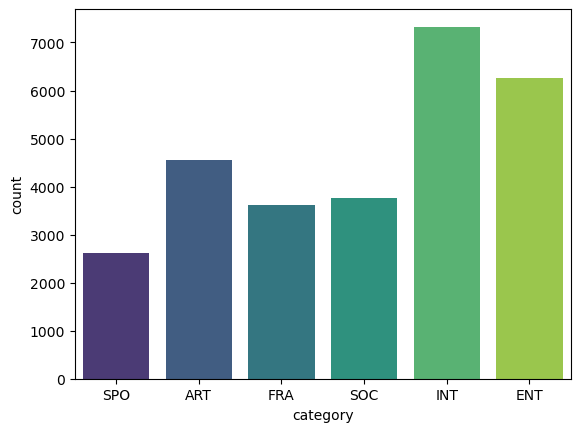

In [46]:
# Plot the statistics of classes
sns.countplot(data=df_filtered, x='category', hue='category',palette='viridis')

In [47]:
# Make the splits and print the sizes for checking
X = df_filtered['text']  # Features 
y = df_filtered['category']  # Target 

# print the size
print(f"size of X : {X.shape}")
print(f"size of y : {y.shape}")

# split data

## step 1 : split in train (80%) et temp (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

## step 2: split temp in dev (10%) and test
X_dev, X_test, y_dev, y_test=  train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

size of X : (28110,)
size of y : (28110,)


In [48]:
# Apply TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer() 
X_train_tfidf = vectorizer.fit_transform(X_train)
X_dev_tfidf = vectorizer.transform(X_dev)

In [49]:
# Train MultinomialNB
# Define hyperparameter grid
alphas = [0.1, 0.5, 1.0, 2.0, 5.0]

best_dev_error = float('inf')
best_model = None
results = []

# Train and evaluate on different alpha values
for alpha in alphas:
    model = MultinomialNB(alpha=alpha)
    model.fit(X_train_tfidf, y_train)
    
    # Evaluate on dev set
    dev_predictions = model.predict(X_dev_tfidf)
    dev_error = 1 - accuracy_score(y_dev, dev_predictions)
    
    results.append((alpha, dev_error))# add error en fonction de alpha
    
    if dev_error < best_dev_error:
        best_dev_error = dev_error
        best_model = model

# Evaluate the best model on the test set.

#####  Transformer X_test in vector with tfidf
X_test_tfidf = vectorizer.transform(X_test)
test_predictions = best_model.predict(X_test_tfidf)
test_error = 1 - accuracy_score(y_test, test_predictions)

# Print results
print("Error rates for different alpha values:")
for alpha, error in results:
    print(f"Alpha: {alpha}, Dev Error: {error:.4f}")

print(f"\nBest model (alpha={best_model.alpha}) Test Error: {test_error:.4f}  Test accuracy: {1-test_error:.4f} ")


# Print confusion matric

Error rates for different alpha values:
Alpha: 0.1, Dev Error: 0.1266
Alpha: 0.5, Dev Error: 0.2081
Alpha: 1.0, Dev Error: 0.2906
Alpha: 2.0, Dev Error: 0.3789
Alpha: 5.0, Dev Error: 0.4806

Best model (alpha=0.1) Test Error: 0.1124  Test accuracy: 0.8876 


Matrice de confusion


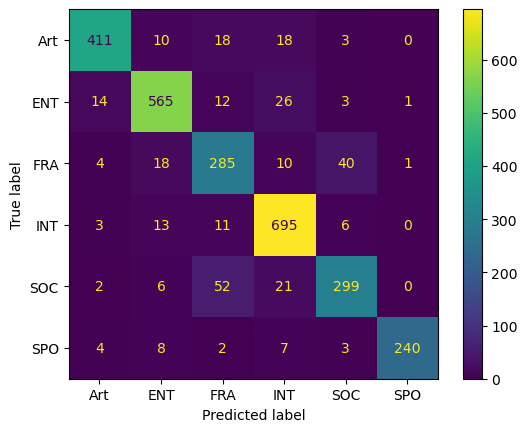

In [50]:
## confusion matrix

dis=ConfusionMatrixDisplay(confusion_matrix(y_test, test_predictions), display_labels=["Art", "ENT", "FRA", "INT", "SOC", "SPO"])
print("Matrice de confusion")
dis.plot()

## What about the LLMs?

**You must write the answer to this question in a notebook hosted in your github account and give access to your supervisor.**

LLMs are reputed to have revolutionised automatic language processing. Since the introduction of BERT-type models, all language processing applications have been based on LLMs, of varying degrees of sophistication and size. These models are trained on multiple tasks and are therefore capable of performing new tasks without learning, simply from a prompt. This is known as "zero-shot learning" because there is no learning phase as such. We are going to test these models on our classification task.

Huggingface is a Franco-American company that develops tools for building applications based on Deep Learning. In particular, it hosts the huggingface.co portal, which contains numerous Deep Learning models. These models can be used very easily thanks to the [Transformer] library (https://huggingface.co/docs/transformers/quicktour) developed by HuggingFace.

Using a transform model in zero-shot learning with HuggingFace is very simple: [see documentation](https://huggingface.co/tasks/zero-shot-classification)

However, you need to choose a suitable model from the list of models compatible with Zero-Shot classification. HuggingFace offers [numerous models](https://huggingface.co/models?pipeline_tag=zero-shot-classification). 

The classes proposed to the model must also provide sufficient semantic information for the model to understand them.

**Question**:

* Write a code to classify an example of text from an article in Le Monde using a model transformed using zero-sot learning with the HuggingFace library.
* choose a model and explain your choice
* choose a formulation for the classes to be predicted
* show that the model predicts a class for the text of the article (correct or incorrect, analyse the results)
* evaluate the performance of your model on 100 articles (a test set).
* note model sizes, processing times and classification results


Notes :
* make sure that you use the correct Tokenizer when using a model 
* start testing with a small number of articles and the first 100's of characters for faster experiments.

#installer les packages necessaires
!pip install transformers torch

In [51]:
#!pip install transformers torch

In [52]:
from transformers import pipeline

# Load the zero-shot classification pipeline
zero_shot_classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

Device set to use cpu


In [ ]:
# Labels candidats avec les abréviations entre parenthèses
candidate_labels = [
    "entreprises (ENT)", "international (INT)", "arts (ART)", 
    "société (SOC)", "France (FRA)", "sports (SPO)", 
    "livres (LIV)", "télévision (TEL)", "font page articles (UNE)"
]

# Extraction des abréviations à partir des labels pour une utilisation dans la matrice de confusion
abbreviations = [label.split('(')[1].split(')')[0] for label in candidate_labels]


# Appliquer le classificateur sur chaque texte
predicted_abbreviations = []
for text in X:
    result = zero_shot_classifier(text, candidate_labels)
    predicted_class = result['labels'][0]
    predicted_abbreviation = predicted_class.split('(')[1].split(')')[0]  # Extraire l'abréviation
    predicted_abbreviations.append(predicted_abbreviation)




# Calculer la matrice de confusion
cm = confusion_matrix(y, predicted_abbreviations, labels=abbreviations)

# Afficher la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=abbreviations)
disp.plot(cmap=plt.cm.Blues)
plt.show()
